In [ ]:
# An end-to-end Scikit-Learn workflow
# Getting the data ready

# Choose the right estimator/algorithm for our problems
# Fit the model 'RF' 'SVM'  'LR' 'NN'


# Evaluating a model
# Improve a model 


# Make a prediction 


# Make any normalization (if needed).
# Make any fix or replaces in the data (if needed).

In [ ]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("riceClassification.csv")

In [ ]:
df.head()

,id,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
0,1,4537,92.229316,64.012769,0.719916,4677,76.004525,0.657536,273.085,0.764510,1.440796,1
1,2,2872,74.691881,51.400454,0.725553,3015,60.471018,0.713009,208.317,0.831658,1.453137,1
2,3,3048,76.293164,52.043491,0.731211,3132,62.296341,0.759153,210.012,0.868434,1.465950,1
3,4,3073,77.033628,51.928487,0.738639,3157,62.551300,0.783529,210.657,0.870203,1.483456,1
4,5,3693,85.124785,56.374021,0.749282,3802,68.571668,0.769375,230.332,0.874743,1.510000,1


In [ ]:
df.tail()

,id,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
18180,18181,5853,148.624571,51.029281,0.939210,6008,86.326537,0.498594,332.960,0.663444,2.912535,0
18181,18182,7585,169.593996,58.141659,0.939398,7806,98.272692,0.647461,385.506,0.641362,2.916910,0
18182,18183,6365,154.777085,52.908085,0.939760,6531,90.023162,0.561287,342.253,0.682832,2.925396,0
18183,18184,5960,151.397924,51.474600,0.940427,6189,87.112041,0.492399,343.371,0.635227,2.941216,0
18184,18185,6134,153.081981,51.590606,0.941500,6283,88.374495,0.489975,338.613,0.672274,2.967245,0


In [ ]:
# try to understand the data ! 
df.describe()

,id,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
count,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000
mean,9093.000000,7036.492989,151.680754,59.807851,0.915406,7225.817872,94.132952,0.616653,351.606949,0.707998,2.599081,0.549079
std,5249.701658,1467.197150,12.376402,10.061653,0.030575,1502.006571,9.906250,0.104389,29.500620,0.067310,0.434836,0.497599
min,1.000000,2522.000000,74.133114,34.409894,0.676647,2579.000000,56.666658,0.383239,197.015000,0.174590,1.358128,0.000000
25%,4547.000000,5962.000000,145.675910,51.393151,0.891617,6125.000000,87.126656,0.538530,333.990000,0.650962,2.208527,0.000000
50%,9093.000000,6660.000000,153.883750,55.724288,0.923259,6843.000000,92.085696,0.601194,353.088000,0.701941,2.602966,1.000000
75%,13639.000000,8423.000000,160.056214,70.156593,0.941372,8645.000000,103.559146,0.695664,373.003000,0.769280,2.964101,1.000000
max,18185.000000,10210.000000,183.211434,82.550762,0.966774,11008.000000,114.016559,0.886573,508.511000,0.904748,3.911845,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18185 entries, 0 to 18184
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               18185 non-null  int64  
 1   Area             18185 non-null  int64  
 2   MajorAxisLength  18185 non-null  float64
 3   MinorAxisLength  18185 non-null  float64
 4   Eccentricity     18185 non-null  float64
 5   ConvexArea       18185 non-null  int64  
 6   EquivDiameter    18185 non-null  float64
 7   Extent           18185 non-null  float64
 8   Perimeter        18185 non-null  float64
 9   Roundness        18185 non-null  float64
 10  AspectRation     18185 non-null  float64
 11  Class            18185 non-null  int64  
dtypes: float64(8), int64(4)
memory usage: 1.7 MB


In [ ]:
df.keys()

Index(['id', 'Area', 'MajorAxisLength', 'MinorAxisLength', 'Eccentricity',
       'ConvexArea', 'EquivDiameter', 'Extent', 'Perimeter', 'Roundness',
       'AspectRation', 'Class'],
      dtype='object')

Text(69.0, 0.5, 'Truth')

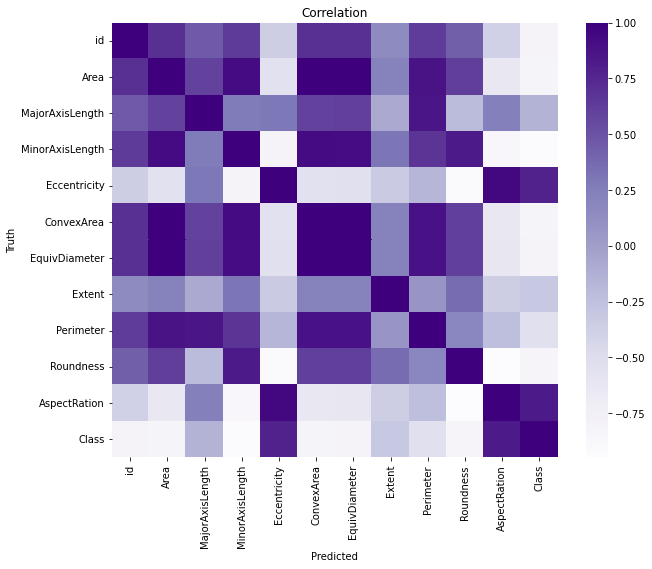

In [ ]:
#correlation value between features
import seaborn as sns
import matplotlib.pyplot as plt
corr = df.corr()
fig = plt.figure(figsize=(10,8))
r = sns.heatmap(corr, cmap='Purples')
r.set_title("Correlation")
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
# see if there's any missing data in 
df.isnull().sum()

id                 0
Area               0
MajorAxisLength    0
MinorAxisLength    0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Perimeter          0
Roundness          0
AspectRation       0
Class              0
dtype: int64

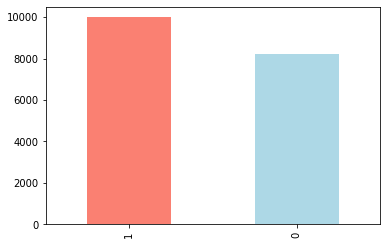

In [ ]:
# try to count is the two class balanced ? 
df['Class'].value_counts().plot(kind="bar", color=["salmon", "lightblue"]);

In [ ]:
df['Class'].value_counts()

1    9985
0    8200
Name: Class, dtype: int64

Text(0.5, 0, 'AspectRation')

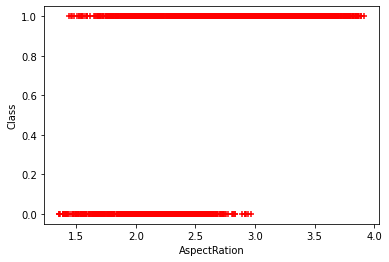

In [ ]:
# Plot the data to get idea 
plt.scatter(df.AspectRation,df.Class,marker='+',color='red')
plt.ylabel('Class')
plt.xlabel('AspectRation')

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
X = df.drop(['id','Class'], axis=1)
y = df['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate Random Forest Classifier
clf = RandomForestClassifier(n_estimators=1000)

# Fit the model to the data (training the machine learning model)
clf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=1000)

In [ ]:
# The highest value for the .score() method is 1.0, the lowest is 0.0
clf.score(X_train, y_train)

1.0

In [ ]:
clf.score(X_test, y_test)


0.9914764916139676

In [ ]:
#Normalizing the data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [ ]:
from sklearn.model_selection import cross_val_score
cross_val_score(clf, X, y, cv=5)

array([0.47154248, 0.91586472, 0.93786087, 0.99725048, 0.58289799])

In [ ]:
cross_val_score(clf, X, y, cv=10)


array([0.45134689, 0.68664101, 0.99945025, 0.99945025, 0.99890049,
       1.        , 0.99944994, 0.99669967, 0.99724972, 0.56050605])

In [ ]:
# Take the mean of 5-fold cross-validation score
clf_cross_val_score = np.mean(cross_val_score(clf, X, y, cv=5))
# Compare the two
clf_cross_val_score

0.7717899367610668

In [ ]:
######################################### the CV Score is 77 % clf_cross_val_score

Cross Validation accuracy scores: [0.98556701 0.99175258 0.98694158 0.99312715 0.98694158 0.99106529
 0.98281787 0.99175258 0.98899587 0.99037139]
Cross Validation accuracy: 0.989 +/- 0.003


In [ ]:
from sklearn.metrics import roc_curve

# Fit the classifier
clf.fit(X_train, y_train)

# Make predictions with probabilities
y_probs = clf.predict_proba(X_test)

y_probs[:10], len(y_probs)

(array([[0.   , 1.   ],
        [0.   , 1.   ],
        [1.   , 0.   ],
        [0.   , 1.   ],
        [0.019, 0.981],
        [0.073, 0.927],
        [0.003, 0.997],
        [1.   , 0.   ],
        [1.   , 0.   ],
        [0.   , 1.   ]]), 3637)

In [ ]:
y_probs_positive = y_probs[:, 1]
y_probs_positive[:10]

array([1.   , 1.   , 0.   , 1.   , 0.981, 0.927, 0.997, 0.   , 0.   ,
       1.   ])

In [ ]:
# Caculate fpr, tpr and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_probs_positive)

# Check the false positive rates
fpr

array([0.00000000e+00, 6.13873542e-04, 1.22774708e-03, 1.22774708e-03,
       1.22774708e-03, 1.22774708e-03, 1.22774708e-03, 1.22774708e-03,
       1.22774708e-03, 1.22774708e-03, 1.22774708e-03, 1.22774708e-03,
       1.22774708e-03, 1.22774708e-03, 1.22774708e-03, 1.84162063e-03,
       1.84162063e-03, 1.84162063e-03, 1.84162063e-03, 1.84162063e-03,
       1.84162063e-03, 1.84162063e-03, 1.84162063e-03, 1.84162063e-03,
       1.84162063e-03, 1.84162063e-03, 1.84162063e-03, 1.84162063e-03,
       1.84162063e-03, 1.84162063e-03, 1.84162063e-03, 2.45549417e-03,
       2.45549417e-03, 2.45549417e-03, 2.45549417e-03, 2.45549417e-03,
       2.45549417e-03, 2.45549417e-03, 2.45549417e-03, 2.45549417e-03,
       2.45549417e-03, 2.45549417e-03, 2.45549417e-03, 2.45549417e-03,
       3.06936771e-03, 3.06936771e-03, 3.06936771e-03, 3.06936771e-03,
       3.06936771e-03, 3.06936771e-03, 3.06936771e-03, 3.06936771e-03,
       3.06936771e-03, 3.06936771e-03, 3.06936771e-03, 3.06936771e-03,
      

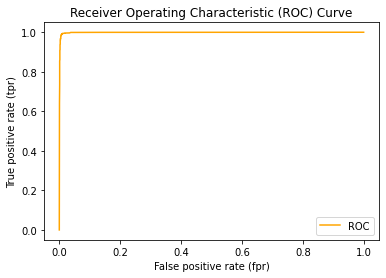

In [ ]:
# Create a function for plotting ROC curves
import matplotlib.pyplot as plt

def plot_roc_curve(fpr, tpr):
    """
    Plots a ROC curve given the false positive rate (fpr)
    and true positive rate (tpr) of a model.
    """
    # Plot roc curve
    plt.plot(fpr, tpr, color="orange", label="ROC")
    # Plot line with no predictive power (baseline)
    #plt.plot([0, 1], [0, 1], color="darkblue", linestyle="--", label="Guessing")
    
    # Customize the plot
    plt.xlabel("False positive rate (fpr)")
    plt.ylabel("True positive rate (tpr)")
    plt.title("Receiver Operating Characteristic (ROC) Curve")
    plt.legend()
    plt.show()

plot_roc_curve(fpr, tpr)

In [ ]:
# END OF RM

In [ ]:
y = df["Class"].values 
x_df = df.drop (["id","Class"],axis = 1)
x = (x_df-np.min(x_df)) / (np.max(x_df)-np.min(x_df))
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(x,y,test_size=0.2,random_state =1)

In [ ]:
# Import the SVC which makes support vector classification by using SVM and create the SVM classifier.
from sklearn.svm import SVC 
svm = SVC(random_state = 1)

In [ ]:
#Train the model using the training sets.
svm.fit(X_train , y_train)

SVC(random_state=1)

In [ ]:
#Calculate the accuracy of the model on the training data and in testing data.
print("train accuracy :" , svm.score(X_train , y_train))
print("test accuracy : " , svm.score(X_test , y_test))

train accuracy : 0.9898267803134452
test accuracy :  0.9903766840802859


In [ ]:
# # improve the accuracy of prediction
# from sklearn.feature_selection import SelectKBest
# from sklearn.feature_selection import f_classif
# accuracy_list_train = []
# number_of_features = np.arange(1,12,1)
# for each in number_of_features : 
#     X_new = SelectKBest(f_classif ).fit_transform(X_train , y_train)
#     svm.fit(X_new , y_train)
#     accuracy_list_train.append(svm.score(X_new , y_train))
    
#     plt.plot(accuracy_list_train , color = "green" , label = "train")
#     plt.xlabel("number of features")
#     plt.ylabel("train accuracy")
#     plt.legend()
#     plt.show()

In [ ]:
# we can see that 5 is the best number of features
d = { 'train_score' : accuracy_list_train}
dfb = pd.DataFrame(data=d)
print("max accuracy :" , dfb["train_score"].max())
print("max accuracy id:" , dfb["train_score"].idxmax())

max accuracy : 0.9898267803134452
max accuracy id: 0


In [ ]:
print("max accuracy values : \n" , dfb.iloc[4])

max accuracy values : 
 train_score    0.989827
Name: 4, dtype: float64


In [ ]:
# Arrange the train and test dataset

selector = SelectKBest(f_classif , k=5)
X_new = selector.fit_transform(X_train , y_train)
X_new_test = selector.fit_transform(X_test , y_test)
names_train = X_train.columns.values[selector.get_support()]
names_test = X_test.columns.values[selector.get_support()]
print("x train features : " , names_train)
print("x test features : " , names_test)

x train features :  ['Area' 'MinorAxisLength' 'ConvexArea' 'Roundness' 'AspectRation']
x test features :  ['Area' 'MinorAxisLength' 'ConvexArea' 'Roundness' 'AspectRation']


In [ ]:
# Re-train and re-calculate the model accuracy using the new arrangement of features
from sklearn.svm import SVC 
svm = SVC (random_state = 1 )
svm.fit(X_new , y_train)

print("train accuracy : " , svm.score(X_new , y_train))
print ("test accuracy : " , svm.score(X_new_test , y_test ))

train accuracy :  0.989689304371735
test accuracy :  0.9898267803134452


In [ ]:
from sklearn.model_selection import cross_val_score
cross_val_score(svm, X, y, cv=5)




array([0.87929612, 0.94088535, 0.94968381, 0.95023371, 0.9056915 ])

In [ ]:
cross_val_score(svm, X, y, cv=10)


array([0.83562397, 0.92413414, 0.93952721, 0.94282573, 0.95876855,
       0.94224422, 0.94444444, 0.95544554, 0.93784378, 0.87623762])

In [ ]:
np.random.seed(42)

# Single training and test split score

# Take the mean of 5-fold cross-validation score
svm_cross_val_score = np.mean(cross_val_score(svm, X, y, cv=10))

# Compare the two
svm_cross_val_score

0.9257095225740277

In [ ]:
############### before the CV the test accuracy was 0.9903766840802859



############### svm_cross_val_score accuracy is 0.9257095225740277

###############Finally  SVM            92%

In [ ]:
from sklearn.linear_model import LogisticRegression
lgrgmodel=LogisticRegression()

In [ ]:
lgrgmodel.fit(X_train,y_train)

LogisticRegression()

In [ ]:
Lgg_predict1=lgrgmodel.predict(X_test)
Lgg_predict1

array([0, 1, 1, ..., 0, 1, 1])

In [ ]:
print("train accuracy :" , lgrgmodel.score(X_train , y_train))
print("test accuracy : " , lgrgmodel.score(X_test , y_test))

train accuracy : 0.9872834753918064
test accuracy :  0.9859774539455596


In [ ]:
#################################################################

In [ ]:
#cross-validation score


In [ ]:
cross_val_score(lgrgmodel, X, y, cv=5)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


array([0.67968106, 0.9994501 , 0.99890019, 0.99642563, 0.94940885])

In [ ]:
cross_val_score(lgrgmodel, X, y, cv=10)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


array([0.65805388, 0.99450247, 1.        , 1.        , 0.99945025,
       0.99944994, 0.99944994, 0.99724972, 0.99559956, 0.91309131])

In [ ]:
Lr_cv = np.mean(cross_val_score(lgrgmodel, X, y, cv=10))
Lr_cv

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


0.955684708107974

In [ ]:
# CV for LR IS 95% 

In [ ]:
pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
y = df["Class"].values 
x_df = df.drop (["id","Class"],axis = 1)
x = (x_df-np.min(x_df)) / (np.max(x_df)-np.min(x_df))
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(x,y,test_size=0.2,random_state =1)

In [ ]:
import tensorflow as tf 
from tensorflow import keras

In [ ]:
X_train.shape

(14548, 10)

In [ ]:
y_train.shape

(14548,)

In [ ]:
#Defining the model and adding the layers
model = keras.Sequential([
    keras.layers.Dense(10,input_shape=(10,), activation='sigmoid')
])

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.fit(X_train,y_train , epochs=100)

Epoch 1/100
455/455 [==============================] - 4s 2ms/step - loss: 1.0626 - accuracy: 0.7023
Epoch 2/100
455/455 [==============================] - 1s 2ms/step - loss: 0.5787 - accuracy: 0.9793
Epoch 3/100
455/455 [==============================] - 1s 2ms/step - loss: 0.4192 - accuracy: 0.9822
Epoch 4/100
455/455 [==============================] - 1s 2ms/step - loss: 0.3202 - accuracy: 0.9827
Epoch 5/100
455/455 [==============================] - 1s 3ms/step - loss: 0.2543 - accuracy: 0.9834
Epoch 6/100
455/455 [==============================] - 1s 3ms/step - loss: 0.2083 - accuracy: 0.9837
Epoch 7/100
455/455 [==============================] - 1s 3ms/step - loss: 0.1751 - accuracy: 0.9841
Epoch 8/100
455/455 [==============================] - 1s 2ms/step - loss: 0.1504 - accuracy: 0.9844
Epoch 9/100
455/455 [==============================] - 1s 2ms/step - loss: 0.1314 - accuracy: 0.9841
Epoch 10/100
455/455 [==============================] - 1s 2ms/step - loss: 0.1166 - accura

In [ ]:
model.evaluate(X_test,y_test)

114/114 [==============================] - 1s 4ms/step - loss: 0.0402 - accuracy: 0.9857


[0.040153853595256805, 0.9857025146484375]